In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv.imread("/Users/miguelcamargorojas/Documents/UP/PDI-Ago-dic25/Grupo A/images/j.png", 0)

In [3]:
def show_img(img, title=""):
    plt.imshow(img, cmap="gray")
    plt.title(title)
    plt.show()

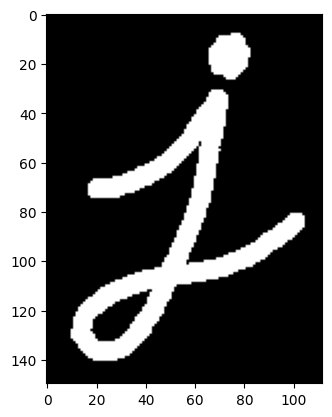

In [4]:
show_img(img)

In [5]:
np.unique(img)

array([  0, 255], dtype=uint8)

---
## Apertura

Erosión -> Dilatación

In [6]:
s_e = np.ones((7, 7), np.uint8)

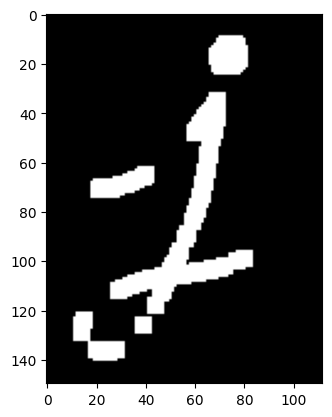

In [7]:
# tmp = cv.erode(img, s_e)
# apertura = cv.dilate(tmp, s_e)

tmp = cv.dilate(cv.erode(img, s_e), s_e)

show_img(tmp)

---

In [10]:
j_noise = cv.imread('/Users/miguelcamargorojas/Documents/UP/PDI-Ago-dic25/Grupo A/images/j_noise.png', 0)
np.unique(j_noise)

array([  0,   1,   2,   3,   4,   7,  10,  11,  12,  16,  18,  19,  21,
        23,  24,  26,  31,  33,  34,  36,  37,  42,  43,  44,  48,  55,
        56,  64,  68,  70,  71,  72,  73,  78,  96, 104, 105, 106, 107,
       108, 109, 111, 112, 123, 124, 126, 127, 128, 130, 133, 143, 159,
       166, 167, 168, 170, 172, 187, 188, 189, 190, 191, 192, 194, 207,
       212, 214, 226, 227, 228, 233, 239, 255], dtype=uint8)

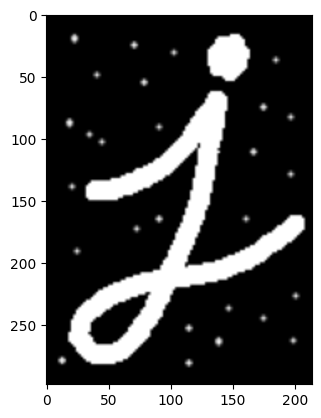

In [11]:
show_img(j_noise)

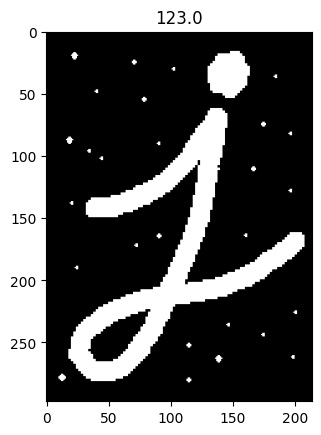

In [12]:
umbral, j_noise_bin = cv.threshold(j_noise, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
show_img(j_noise_bin, umbral)

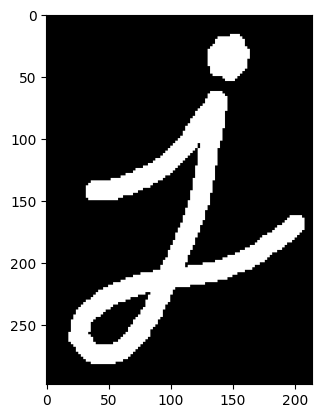

In [13]:
s_e = np.ones((5, 5), np.uint8)
show_img(cv.dilate(cv.erode(j_noise_bin, s_e), s_e))

---

In [14]:
cv.MORPH_ERODE

0

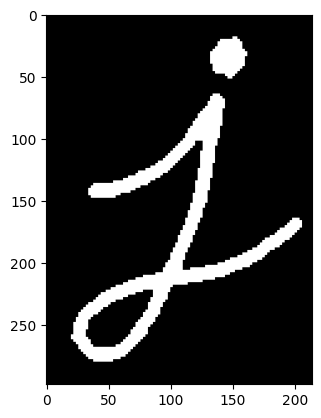

In [15]:
# Erosión con morphologyEx - NO TIENE SENTIDO PORQUE ES UNA OP PRIMITIVA Y TIENE SU FUNCIÓN DEDICADA

show_img(cv.morphologyEx(j_noise_bin, cv.MORPH_ERODE, s_e))

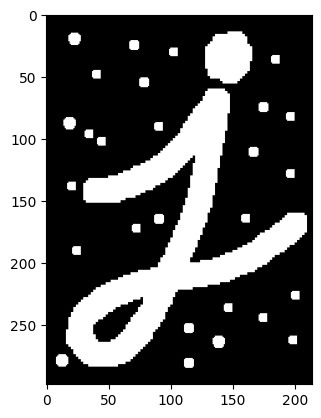

In [16]:
# Dilatar con morphologyEx - NO TIENE SENTIDO PORQUE ES UNA OP PRIMITIVA Y TIENE SU FUNCIÓN DEDICADA

show_img(cv.morphologyEx(j_noise_bin, cv.MORPH_DILATE, s_e))

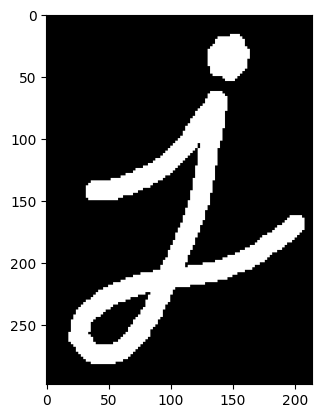

In [17]:
# Apertura con morphologyEx 

show_img(cv.morphologyEx(j_noise_bin, cv.MORPH_OPEN, s_e))

---
## Cierre
Dilatación -> Erosión

In [20]:
j_hole = cv.imread('/Users/miguelcamargorojas/Documents/UP/PDI-Ago-dic25/Grupo A/images/j_hole.png', 0)
np.unique(j_hole)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

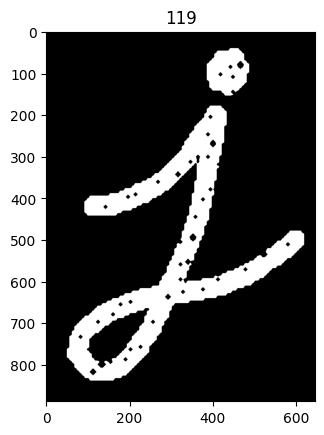

In [21]:
umbral, j_hole_bin = cv.threshold(j_hole, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
show_img(j_hole_bin, str(int(umbral)))

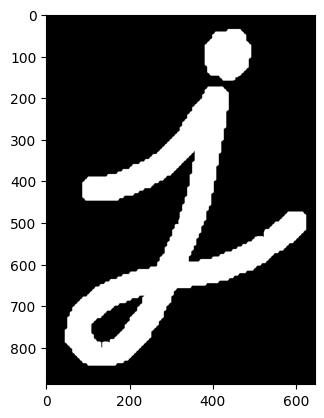

In [22]:
s_e = np.ones((11, 11), np.uint8)
show_img(cv.dilate(j_hole_bin, s_e))

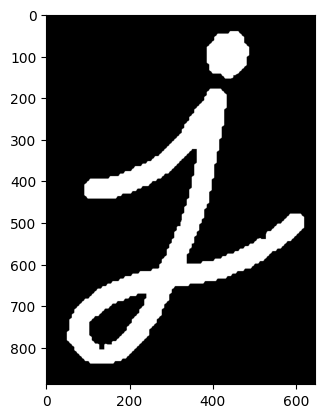

In [23]:
s_e = np.ones((11, 11), np.uint8)
show_img(cv.erode(cv.dilate(j_hole_bin, s_e), s_e))

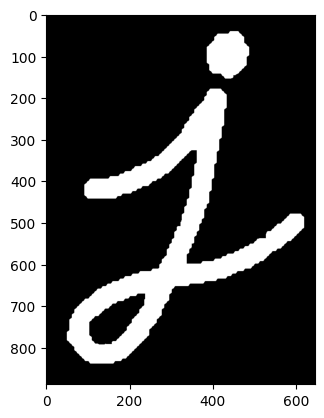

In [24]:
s_e = np.ones((5, 5), np.uint8)
show_img(cv.morphologyEx(j_hole_bin, cv.MORPH_CLOSE, s_e, iterations=3))

---
## Morphological Gradient

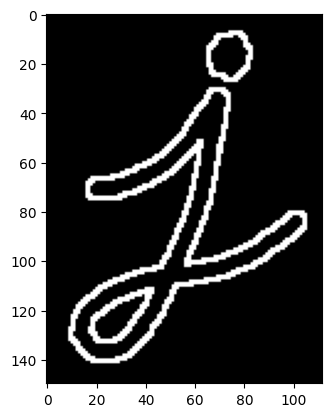

In [25]:
s_e = np.ones((3, 3), np.uint8)
show_img(cv.morphologyEx(img, cv.MORPH_GRADIENT, s_e))

---
## Top Hat

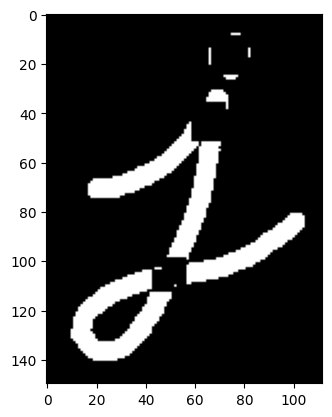

In [26]:
s_e = np.ones((9, 9), np.uint8)
show_img(cv.morphologyEx(img, cv.MORPH_TOPHAT, s_e))

---
## Black Hat

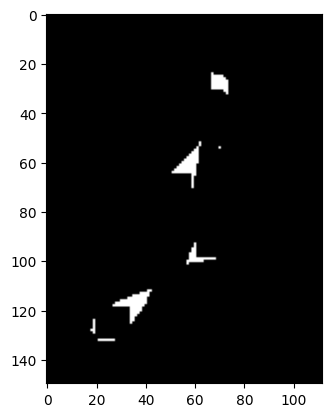

In [27]:
show_img(cv.morphologyEx(img, cv.MORPH_BLACKHAT, s_e))

---

Otro tipo de elementos estructurantes

In [29]:
cv.MORPH_RECT

0

In [32]:
cv.getStructuringElement(cv.MORPH_RECT, (7, 5))

array([[1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

In [33]:
cv.MORPH_CROSS

1

In [34]:
cv.getStructuringElement(cv.MORPH_CROSS, (7, 7))

array([[0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0]], dtype=uint8)

In [35]:
cv.MORPH_ELLIPSE

2

In [39]:
cv.getStructuringElement(cv.MORPH_ELLIPSE, (11, 11))

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]], dtype=uint8)

---

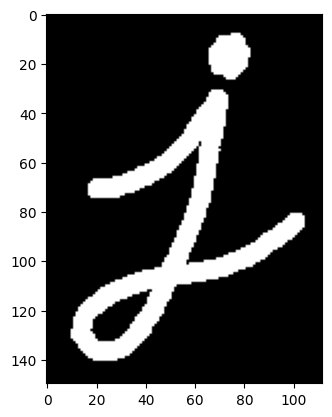

In [40]:
show_img(img)

In [54]:
kernel_cruz = cv.getStructuringElement(cv.MORPH_CROSS, (11, 11))

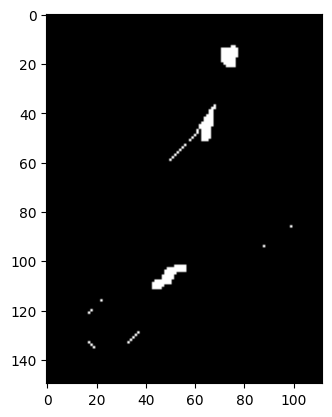

In [55]:
show_img(cv.erode(img, kernel_cruz))

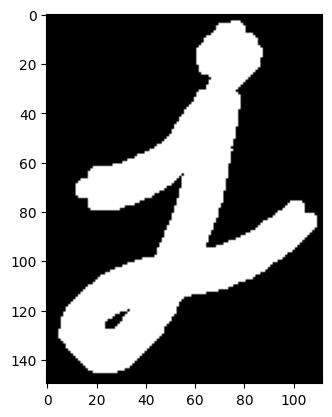

In [56]:
show_img(cv.dilate(img, kernel_cruz))

In [60]:
kernel_el = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7, 7))

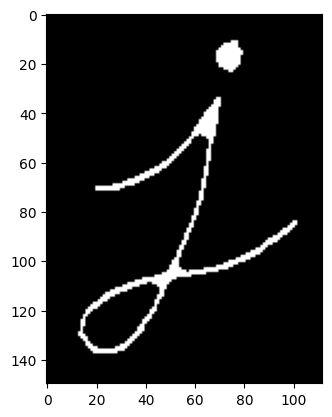

In [61]:
show_img(cv.erode(img, kernel_el))

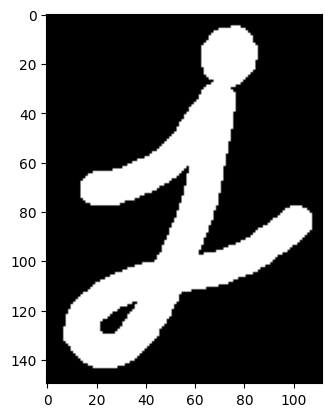

In [62]:
show_img(cv.dilate(img, kernel_el))